### 데이터 수집 및 전처리
* 원하는 데이터를 웹에서 수집할 수 있다고 해도 그걸 바로 사용하긴 힘들것
* 왜냐하면 바로 활용하기는 지저분할 수 있기 때문
* 그래서 전처리가 필요

In [1]:
# 서버와 요청을 주고 받는 걸 해줄 수 있는 라이브러리 --> requests
import requests

In [2]:
# 네이버 메인 페이지로 요청
naver_url = 'https://www.naver.com/'
naver_response = requests.get(naver_url)

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
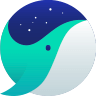
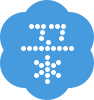

In [3]:
# 이를 문자열로 보자 --> text
naver_response.text

* 그럼 이 중에서 우리가 원하는 부분만 뽑으려면... "BeautifulSoup"

In [5]:
import bs4

naver_bs = bs4.BeautifulSoup(naver_response.text,'lxml') # 대부분 웹에서 requests로 가져오는 데이터는 lxml 옵션으로 입력하면 됨

In [6]:
# find와 find_all 사용
naver_bs.find('span',class_='ah_k')

In [12]:
# find로 찾은 결과에서 내용만 보기
result = naver_bs.find('div',class_='group_nav') # span 태그에 있고, span 태그는 class 속성이 있고, 해당 속성값은 ah_k
result.text

'\n\n\n메일\n\n카페\n블로그\n지식iN\n쇼핑\nPay\n\nTV\n\n\n\n사전\n뉴스\n증권\n부동산\n지도\n영화\nVIBE\n책\n웹툰\n\n\n더보기\n\n서비스 전체보기\n메뉴설정\n초기화\n저장\n\n'

In [13]:
# find_all로 원하는 내용 모두 찾기
naver_bs.find_all('div',class_='group_nav')

[<div class="group_nav">
 <ul class="list_nav type_fix">
 <li class="nav_item">
 <a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
 </li>
 <li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>
 <li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
 <li class="nav_item">
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
 </li>
 </ul>
 <ul class="list_nav NM_FAVORITE_LIST">
 <li class="nav_item"><a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a></li>
 <li clas

In [14]:
# find_all 결과에서 내용만 가져오기
result_list = naver_bs.find_all('div',class_='group_nav')
for div in result_list:
    print(div.text)




메일

카페
블로그
지식iN
쇼핑
Pay

TV



사전
뉴스
증권
부동산
지도
영화
VIBE
책
웹툰


더보기

서비스 전체보기
메뉴설정
초기화
저장




#### 재무데이터 구해오기
* company guide 활용 (ref: https://comp.fnguide.com/svo2/asp/SVD_Main.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=101&stkGb=701)

* company guide의 url을 통해 알 수 있는 것 --> 종목번호만 바꿔주면 각 종목별 정보창으로 접근할 수 있음

In [17]:
# pandas를 통해 재무제표 페이지에서 테이블들 찾아오기
import pandas as pd

fs_url = "https://comp.fnguide.com/svo2/asp/SVD_Finance.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701"
fs_page = requests.get(fs_url)
fs_tables = pd.read_html(fs_page.text)
fs_tables

[                              IFRS(연결)    2017/12    2018/12    2019/12  \
 0                                  매출액  2395754.0  2437714.0  2304009.0   
 1                                 매출원가  1292907.0  1323944.0  1472395.0   
 2                                매출총이익  1102847.0  1113770.0   831613.0   
 3                판매비와관리비계산에 참여한 계정 펼치기   566397.0   524903.0   553928.0   
 4                                 영업이익   536450.0   588867.0   277685.0   
 5                           영업이익(발표기준)   536450.0   588867.0   277685.0   
 6                   금융수익계산에 참여한 계정 펼치기    97374.0    99993.0   101616.0   
 7                   금융원가계산에 참여한 계정 펼치기    89789.0    86089.0    82749.0   
 8                   기타수익계산에 참여한 계정 펼치기    30107.0    14850.0    17787.0   
 9                   기타비용계산에 참여한 계정 펼치기    14196.0    11420.0    14147.0   
 10  종속기업,공동지배기업및관계기업관련손익계산에 참여한 계정 펼치기     2014.0     5398.0     4130.0   
 11                            세전계속사업이익   561960.0   611600.0   304322.0   
 12         

In [18]:
# 포관손익계산서(연간)만 불러오기
fs_tables[0]

,IFRS(연결),2017/12,2018/12,2019/12,2020/09,전년동기,전년동기(%)
0,매출액,2395754.0,2437714.0,2304009.0,1752555.0,1705161.0,2.8
1,매출원가,1292907.0,1323944.0,1472395.0,1066834.0,1086850.0,-1.8
2,매출총이익,1102847.0,1113770.0,831613.0,685721.0,618311.0,10.9
3,판매비와관리비계산에 참여한 계정 펼치기,566397.0,524903.0,553928.0,416252.0,412229.0,1.0
4,영업이익,536450.0,588867.0,277685.0,269469.0,206082.0,30.8
5,영업이익(발표기준),536450.0,588867.0,277685.0,269469.0,206082.0,30.8
6,금융수익계산에 참여한 계정 펼치기,97374.0,99993.0,101616.0,78900.0,78645.0,0.3
7,금융원가계산에 참여한 계정 펼치기,89789.0,86089.0,82749.0,70780.0,63161.0,12.1
8,기타수익계산에 참여한 계정 펼치기,30107.0,14850.0,17787.0,11012.0,11789.0,-6.6
9,기타비용계산에 참여한 계정 펼치기,14196.0,11420.0,14147.0,18618.0,8752.0,112.7


In [19]:
# 데이터 전처리
temp_df = fs_tables[0]
temp_df = temp_df.set_index('IFRS(연결)')
temp_df = temp_df[["2017/12",	"2018/12",	"2019/12", "2020/09"]] # 전년동기 부분은 제거
temp_df

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,2395754.0,2437714.0,2304009.0,1752555.0
매출원가,1292907.0,1323944.0,1472395.0,1066834.0
매출총이익,1102847.0,1113770.0,831613.0,685721.0
판매비와관리비계산에 참여한 계정 펼치기,566397.0,524903.0,553928.0,416252.0
영업이익,536450.0,588867.0,277685.0,269469.0
영업이익(발표기준),536450.0,588867.0,277685.0,269469.0
금융수익계산에 참여한 계정 펼치기,97374.0,99993.0,101616.0,78900.0
금융원가계산에 참여한 계정 펼치기,89789.0,86089.0,82749.0,70780.0
기타수익계산에 참여한 계정 펼치기,30107.0,14850.0,17787.0,11012.0


In [21]:
# 사용할 행만 남기기
temp_df = temp_df.loc[['매출액','영업이익','당기순이익']]
temp_df

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,2395754.0,2437714.0,2304009.0,1752555.0
영업이익,536450.0,588867.0,277685.0,269469.0
당기순이익,421867.0,443449.0,217389.0,198007.0


In [22]:
# 재무상태표와 현금흐름표도 마찬가지로 필요한 것들만 데이터프레임으로 정리
temp_df2 = fs_tables[2]
temp_df2 = temp_df2.set_index('IFRS(연결)')
temp_df2 = temp_df2.loc[["자산","부채","자본"]]

temp_df3 = fs_tables[4]
temp_df3 = temp_df3.set_index('IFRS(연결)')
temp_df3 = temp_df3.loc[["영업활동으로인한현금흐름"]]

In [23]:
temp_df2

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
자산,3017521.0,3393572.0,3525645.0,3757887.0
부채,872607.0,916041.0,896841.0,996526.0
자본,2144914.0,2477532.0,2628804.0,2761362.0


In [24]:
temp_df3

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
영업활동으로인한현금흐름,621620.0,670319.0,453829.0,407724.0


In [26]:
# 재무제표 페이지의 데이터프레임 이어 붙이기
fs_df = pd.concat([temp_df,temp_df2,temp_df3])
fs_df

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,2395754.0,2437714.0,2304009.0,1752555.0
영업이익,536450.0,588867.0,277685.0,269469.0
당기순이익,421867.0,443449.0,217389.0,198007.0
자산,3017521.0,3393572.0,3525645.0,3757887.0
부채,872607.0,916041.0,896841.0,996526.0
자본,2144914.0,2477532.0,2628804.0,2761362.0
영업활동으로인한현금흐름,621620.0,670319.0,453829.0,407724.0


In [54]:
# 삼성전자뿐만 아니라 다른 회사 데이터 수집용으로 일반화
def make_fs_dataframe(firm_code):
    fs_url = "https://comp.fnguide.com/svo2/asp/SVD_Finance.asp?pGB=1&gicode=" + firm_code + \
    "&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701"
    fs_page = requests.get(fs_url)
    fs_tables = pd.read_html(fs_page.text)
    
    # 포괄손익계산서
    temp_df = fs_tables[0]
    temp_df = temp_df.set_index(temp_df.columns[0]) # 앞서는 'IFRS(연결)'로 지정했지만 "GAAP"인 회사도 있기 때문에 첫 번째 칼럼으로 지정
    temp_df = temp_df[temp_df.columns[:4]] # 앞서는 연도를 따로 지정했지만 안정적인 일반화를 위해 칼럼 순서로 지정
    temp_df = temp_df.loc[['매출액','영업이익','당기순이익']]
    # 재무상태표
    temp_df2 = fs_tables[2]
    temp_df2 = temp_df2.set_index(temp_df2.columns[0])
    temp_df2 = temp_df2.loc[['자산','부채','자본']]
    # 현금흐름표
    temp_df3 = fs_tables[4]
    temp_df3 = temp_df3.set_index(temp_df3.columns[0])
    temp_df3 = temp_df3.loc[['영업활동으로인한현금흐름']]
    
    fs_df = pd.concat([temp_df,temp_df2,temp_df3])
    
    return fs_df

In [55]:
# 함수를 시험 --> 카카오(A035720) 재무제표 불러오기
firm_code = 'A035720'
make_fs_dataframe(firm_code)

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,19723.0,24170.0,30701.0,29217.0
영업이익,1654.0,729.0,2068.0,3062.0
당기순이익,1251.0,159.0,-3419.0,3688.0
자산,63494.0,79595.0,87373.0,112326.0
부채,18865.0,23324.0,29971.0,37628.0
자본,44629.0,56272.0,57401.0,74698.0
영업활동으로인한현금흐름,3719.0,4915.0,7527.0,6688.0


* 회사명을 행으로 지정하여 시기별로 재무제표를 관리하면 더 효율적일 것

In [59]:
firm_code = 'A035720'
fs_df = make_fs_dataframe(firm_code)
temp_df = pd.DataFrame({firm_code: fs_df['2017/12']})
temp_df = temp_df.T
temp_df.columns = [['2017/12']*len(fs_df),temp_df.columns] # 날짜는 칼럼의 길이만큼 반복, 그리고 기존의 칼럼 추가

In [60]:
temp_df

2017/12                                                        
IFRS(연결)      매출액    영업이익   당기순이익       자산       부채       자본 영업활동으로인한현금흐름
A035720   19723.0  1654.0  1251.0  63494.0  18865.0  44629.0       3719.0

In [65]:
# 시기별로 한 줄로 쭉 나타내보자
firm_code = 'A035720'
fs_df = make_fs_dataframe(firm_code)

for num, col in enumerate(fs_df.columns):
    temp_df = pd.DataFrame({firm_code: fs_df[col]})
    temp_df = temp_df.T
    temp_df.columns = [[col]*len(fs_df),temp_df.columns]
    if num==0:
        total_df = temp_df
    else:
        total_df = pd.merge(total_df, temp_df, how='outer', left_index = True, right_index = True)
total_df

2017/12                                                          \
IFRS(연결)      매출액    영업이익   당기순이익       자산       부채       자본 영업활동으로인한현금흐름   
A035720   19723.0  1654.0  1251.0  63494.0  18865.0  44629.0       3719.0   

          2018/12                ...  2019/12                        2020/09  \
IFRS(연결)      매출액   영업이익  당기순이익  ...       부채       자본 영업활동으로인한현금흐름      매출액   
A035720   24170.0  729.0  159.0  ...  29971.0  57401.0       7527.0  29217.0   

                                                                   
IFRS(연결)    영업이익   당기순이익        자산       부채       자본 영업활동으로인한현금흐름  
A035720   3062.0  3688.0  112326.0  37628.0  74698.0       6688.0  

[1 rows x 28 columns]

In [67]:
# 데이터프레임 형태바꾸기 함수화
def change_df(firm_code,dataframe):
    for num, col in enumerate(fs_df.columns):
        temp_df = pd.DataFrame({firm_code: dataframe[col]})
        temp_df = temp_df.T
        temp_df.columns = [[col]*len(dataframe),temp_df.columns]
        if num == 0:
            total_df = temp_df
        else:
            total_df = pd.merge(total_df, temp_df, how='outer', left_index = True, right_index = True)
    
    return total_df

In [71]:
# 4개 회사의 재무제표 데이터 가져와서 합치기
firmcode_list = ['A005930','A018260','A000660','A326030'] # 삼성전자, 삼성에스디에스, SK하이닉스, SK바이오팜

for num, code in enumerate(firmcode_list):
    fs_df = make_fs_dataframe(code)
    fs_df_changed = change_df(code, fs_df)
    if num==0:
        total_fs = fs_df_changed
    else:
        total_fs = pd.concat([total_fs,fs_df_changed])

total_fs

2017/12                                                      \
IFRS(연결)        매출액      영업이익     당기순이익         자산        부채         자본   
A005930   2395754.0  536450.0  421867.0  3017521.0  872607.0  2144914.0   
A018260     92992.0    7316.0    5418.0    72778.0   15583.0    57194.0   
A000660    301094.0  137213.0  106422.0   454185.0  115975.0   338209.0   
A326030         NaN    -989.0    -976.0      984.0     511.0      472.0   

                         2018/12                      ...   2019/12  \
IFRS(연결) 영업활동으로인한현금흐름        매출액      영업이익     당기순이익  ...        부채   
A005930      621620.0  2437714.0  588867.0  443449.0  ...  896841.0   
A018260        8348.0   100342.0    8774.0    6388.0  ...   22961.0   
A000660      146906.0   404451.0  208438.0  155400.0  ...  168463.0   
A326030        -983.0       11.0   -1391.0   -1381.0  ...    1521.0   

                                    2020/09                                 \
IFRS(연결)         자본 영업활동으로인한현금흐름        매출액      영업이익     당기순이익         자산   
A005930   2628804.0     453829.0  1752555.0  269469.0  198007.0  3757887.0   
A018260     67252.0       8938.0    79709.0    5878.0    2765.0    92083.0   
A000660    479432.0      64832.0   239342.0   40467.0   29912.0   692672.0   
A326030      -130.0       -813.0       99.0   -1860.0   -1893.0     5608.0   

                                            
IFRS(연결)        부채         자본 영업활동으로인한현금흐름  
A005930   996526.0  2761362.0     407724.0  
A018260    24076.0    68007.0       6768.0  
A000660   187681.0   504991.0      90527.0  
A326030     1180.0     4427.0      -1999.0  

[4 rows x 28 columns]

* 재무비율 정보도 똑같은 방법으로 정리

In [73]:
firm_code = 'A005930'
fr_url = "https://comp.fnguide.com/svo2/asp/SVD_FinanceRatio.asp?pGB=1&gicode="\
+ firm_code + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701"
fr_page = requests.get(fr_url)
fr_tables = pd.read_html(fr_page.text)
fr_tables[0]

,IFRS(연결),2016/12,2017/12,2018/12,2019/12,2020/09
0,안정성비율,안정성비율,안정성비율,안정성비율,안정성비율,안정성비율
1,유동비율계산에 참여한 계정 펼치기,258.5,218.8,252.9,284.4,278.8
2,당좌비율계산에 참여한 계정 펼치기,225.0,181.6,210.9,242.4,234.4
3,부채비율계산에 참여한 계정 펼치기,35.9,40.7,37.0,34.1,36.1
4,유보율계산에 참여한 계정 펼치기,21757.6,23681.4,26648.2,28302.4,29753.8
5,순차입금비율계산에 참여한 계정 펼치기,NaN,NaN,NaN,NaN,NaN
6,이자보상배율계산에 참여한 계정 펼치기,49.7,81.9,87.3,40.5,79.0
7,자기자본비율계산에 참여한 계정 펼치기,73.6,71.1,73.0,74.6,73.5
8,성장성비율,성장성비율,성장성비율,성장성비율,성장성비율,성장성비율
9,매출액증가율계산에 참여한 계정 펼치기,0.6,18.7,1.8,-5.5,2.8


In [74]:
def make_fr_dataframe(firm_code):
    fr_url = "https://comp.fnguide.com/svo2/asp/SVD_FinanceRatio.asp?pGB=1&gicode="\
    + firm_code + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701"
    fr_page = requests.get(fr_url)
    fr_tables = pd.read_html(fr_page.text)
    
    temp_df = fr_tables[0]
    temp_df = temp_df.set_index(temp_df.columns[0])
    temp_df = temp_df.loc[['유동비율계산에 참여한 계정 펼치기','부채비율계산에 참여한 계정 펼치기','영업이익률계산에 참여한 계정 펼치기',
                          'ROA계산에 참여한 계정 펼치기','ROIC계산에 참여한 계정 펼치기']]
    temp_df.index = ['유동비율','부채비율','영업이익률','ROA','ROIC']
    
    return temp_df

In [75]:
firm_code = 'A005930'
make_fr_dataframe(firm_code)

,2016/12,2017/12,2018/12,2019/12,2020/09
유동비율,258.5,218.8,252.9,284.4,278.8
부채비율,35.9,40.7,37.0,34.1,36.1
영업이익률,14.5,22.4,24.2,12.1,15.4
ROA,9.0,15.0,13.8,6.3,7.3
ROIC,20.3,33.2,30.4,13.2,16.7


In [78]:
# 재무제표와 마찬가지로 재무비율 데이터도 4개 회사의 것을 합쳐보자
firmcode_list = ['A005930','A018260','A000660','A326030']

for num, code in enumerate(firmcode_list):
    fr_df = make_fr_dataframe(code)
    fr_df_changed = change_df(code,fr_df)
    if num==0:
        total_fr = fr_df_changed
    else:
        total_fr = pd.concat([total_fr,fr_df_changed])
        
total_fr

2017/12                           2018/12                          \
           유동비율   부채비율 영업이익률    ROA  ROIC    유동비율  부채비율     영업이익률     ROA   
A005930   218.8   40.7  22.4   15.0  33.2   252.9  37.0      24.2    13.8   
A018260   386.3   27.3   7.9    7.7  19.0   373.5  30.3       8.7     8.4   
A000660   213.3   34.3  45.6   27.4  41.0   152.7  35.9      51.5    28.5   
A326030   174.2  108.2   NaN  -66.8   NaN   263.3  63.0  -12660.3  -142.4   

              2019/12                           2020/09                        \
         ROIC    유동비율  부채비율  영업이익률    ROA  ROIC    유동비율  부채비율    영업이익률    ROA   
A005930  30.4   284.4  34.1   12.1    6.3  13.2   278.8  36.1     15.4    7.3   
A018260  22.8   375.9  34.1    9.2    8.8  25.8   359.7  35.4      7.4    4.0   
A000660  44.6   183.6  35.1   10.1    3.1   5.0   192.5  37.2     16.9    6.0   
A326030   NaN    67.8  완전잠식  -64.0  -61.0   NaN   508.8  26.7  -1875.6  -72.1   

                 
           ROIC  
A005930    16.7  
A018260    11.1  
A000660     7.8  
A326030  -800.7

* 다음은 투자지표 데이터도 똑같이 가져와서 수정

In [81]:
firm_code = 'A005930'
invest_url = 'https://comp.fnguide.com/svo2/asp/SVD_Invest.asp?pGB=1&gicode='\
+ firm_code + '&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701'
invest_page = requests.get(invest_url)
invest_tables = pd.read_html(invest_page.text)
temp_df = invest_tables[1]
temp_df

,IFRS 연결,2016/12,2017/12,2018/12,2019/12,2020/09
0,Per Share,Per Share,Per Share,Per Share,Per Share,Per Share
1,EPS계산에 참여한 계정 펼치기(원),2735,5421,6024,3166,2892
2,EBITDAPS계산에 참여한 계정 펼치기(원),6095,9934,11717,8445,7273
3,CFPS계산에 참여한 계정 펼치기(원),5263,8321,9659,7523,6199
4,SPS계산에 참여한 계정 펼치기(원),24632,31414,33458,33919,25801
5,BPS계산에 참여한 계정 펼치기(원),24340,28971,35342,37528,39446
6,Dividends,Dividends,Dividends,Dividends,Dividends,Dividends
7,"DPS(보통주,현금)(원)계산에 참여한 계정 펼치기",570,850,1416,1416,1062
8,"DPS(1우선주,현금)(원)계산에 참여한 계정 펼치기",571,851,1417,1417,1062
9,배당성향(현금)(%)계산에 참여한 계정 펼치기,17.81,14.09,21.92,44.73,NaN


In [82]:
# 투자지표 데이터프레임을 만드는 코드 함수화
def make_invest_dataframe(firm_code):
    invest_url = 'https://comp.fnguide.com/svo2/asp/SVD_Invest.asp?pGB=1&gicode='\
    + firm_code + '&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701'
    invest_page = requests.get(invest_url)
    invest_tables = pd.read_html(invest_page.text)
    temp_df = invest_tables[1]
    
    temp_df = temp_df.set_index(temp_df.columns[0])
    temp_df = temp_df.loc[['PER계산에 참여한 계정 펼치기','PCR계산에 참여한 계정 펼치기','PSR계산에 참여한 계정 펼치기',
                           'PBR계산에 참여한 계정 펼치기','총현금흐름']]
    temp_df.index = ['PER','PCR','PSR','PBR','총현금흐름']
    
    return temp_df

In [83]:
# 4개 회사의 투자지표 합쳐보기
firmcode_list = ['A005930','A018260','A000660','A326030']

for num, code in enumerate(firmcode_list):
    invest_df = make_invest_dataframe(code)
    invest_df_changed = change_df(code,invest_df)
    if num==0:
        total_invest = invest_df_changed
    else:
        total_invest = pd.concat([total_invest,invest_df_changed])
        
total_invest

2017/12                            2018/12                             \
            PER    PCR   PSR   PBR   총현금흐름     PER    PCR   PSR   PBR   총현금흐름   
A005930    9.40   6.12  1.62  1.76  623891    6.42   4.01  1.16  1.10  691786   
A018260   29.18  17.93  1.66  2.78    8597   25.08  16.83  1.57  2.64    8942   
A000660    5.23   3.55  1.85  1.61  158916    2.83   2.00  1.09  0.89  216062   
A326030     NaN    NaN   NaN   NaN    -964     NaN    NaN   NaN   NaN   -1364   

        2019/12                            2020/09                           
            PER    PCR   PSR   PBR   총현금흐름     PER  PCR  PSR    PBR   총현금흐름  
A005930   17.63   7.42  1.65  1.49  494337     NaN  NaN  NaN   1.48  419535  
A018260   20.44  12.77  1.40  2.30   11594     NaN  NaN  NaN   1.98    5940  
A000660   34.03   6.48  2.54  1.36  107927     NaN  NaN  NaN   1.15  102029  
A326030     NaN    NaN   NaN   NaN    -606     NaN  NaN  NaN  27.68   -1790

#### 전 종목 코드 구해오기
* 한국거래소에서 수집 (ref: http://www.krx.co.kr/main/main.jsp)
* 엑셀 혹은 CSV 형태로 다운로드 가능

In [85]:
# 엑셀 파일 불러오기
path = r'E:\jupyter\Quant with Python\Excel_data\krx_data.xlsx'
code_data = pd.read_excel(path)
code_data = code_data[['표준코드','단축코드','한글 종목약명']]
code_data

,표준코드,단축코드,한글 종목약명
0,KR7098120009,098120,마이크로컨텍솔
1,KR7131100000,131100,스카이이앤엠
2,KR7009520008,009520,포스코엠텍
3,KR7095570008,095570,AJ네트웍스
4,KR7006840003,006840,AK홀딩스
...,...,...,...
2532,KR7000542001,000547,흥국화재2우B
2533,KR7000540005,000540,흥국화재
2534,KR7003280005,003280,흥아해운
2535,KR7037440005,037440,희림


* 앞서 활용했던 company guide에서 확인할 수 있듯이 사이트 주소창에 나타나는 종목코드는 앞에 'A'가 붙는다
* 그러므로 데이터를 원활하게 수집하기 위해선 종목코드에 'A'를 붙여줘야 할 거 같음

In [86]:
# apply 함수 활용하여 A를 붙여주자
# apply --> 데이터프레임의 특정 칼럼 전체에 주어진 함수를 적용
def make_code(x):
    x = str(x) # 문자열로 만들어주기
    return 'A' + x
    
code_data['단축코드'] = code_data['단축코드'].apply(make_code)

code_data

,표준코드,단축코드,한글 종목약명
0,KR7098120009,A098120,마이크로컨텍솔
1,KR7131100000,A131100,스카이이앤엠
2,KR7009520008,A009520,포스코엠텍
3,KR7095570008,A095570,AJ네트웍스
4,KR7006840003,A006840,AK홀딩스
...,...,...,...
2532,KR7000542001,A000547,흥국화재2우B
2533,KR7000540005,A000540,흥국화재
2534,KR7003280005,A003280,흥아해운
2535,KR7037440005,A037440,희림


In [89]:
# 이제 한국거래소에 상장된 전 종목의 재무데이터를 가져와야 한다
import time # 시간차를 위한 모듈 (지나치게 빠른 속도로 수집을 하면 서버에서 로봇으로 인식할 가능성 있기 때문)

for num, code in enumerate(code_data['단축코드']):
    try:
        print(num, code)
        time.sleep(1)
        try:
            fs_df = make_fs_dataframe(code)
        except requests.exceptions.Timeout: # Timeout 에러가 발생하면 exception으로 보고 60초 코드를 멈추었다가 다시 make_fs_dataframe 함수를 수행하게 만든 것
            time_sleep(60)
            fs_df = make_fs_dataframe(code)
        fs_df_changed = change_df(code,fs_df)
        if num==0: # 첫 번째 시행 + 그 이후의 시행
            total_fs = fs_df_changed
        else:
            total_fs = pd.concat([total_fs, fs_df_changed])
    except ValueError: # 예외처리를 위한 코드 (company guide에서 칼럼명이 회사마다 다르게 들어가 있을 수 있음)
        continue
    except KeyError:
        continue
            
total_fs

0 A098120
1 A131100
2 A009520
3 A095570
4 A006840
5 A282330
6 A027410
7 A138930
8 A001465
9 A001460
10 A001045
11 A00104K
12 A001040
13 A011155
14 A011150
15 A058820
16 A000590
17 A012030
18 A016610
19 A005830
20 A000995
21 A000990
22 A139130
23 A001530
24 A000215
25 A000210
26 A37550K
27 A375500
28 A155660
29 A069730
30 A017940
31 A365550
32 A007700
33 A078935
34 A006360
35 A078930
36 A012630
37 A294870
38 A003560
39 A175330
40 A234080
41 A001065
42 A001067
43 A001060
44 A096760
45 A105560
46 A024120
47 A009070
48 A044180
49 A016385
50 A016380
51 A001390
52 A001940
53 A025000
54 A092230
55 A000040
56 A093050
57 A003555
58 A034220
59 A003550
60 A001120
61 A051905
62 A051900
63 A032640
64 A011070
65 A066575
66 A066570
67 A051915
68 A051910
69 A079550
70 A010120
71 A000680
72 A006260
73 A023150
74 A035420
75 A181710
76 A338100
77 A034310
78 A008260
79 A004255
80 A004250
81 A010060
82 A100840
83 A064960
84 A003570
85 A036530
86 A010955
87 A010950
88 A950110
89 A101060
90 A005090
91 A00236

692 A208890
693 A049950
694 A213090
695 A207760
696 A225850
697 A002840
698 A268280
699 A107590
700 A134380
701 A003650
702 A059090
703 A214610
704 A201490
705 A950190
706 A214180
707 A155900
708 A206640
709 A018700
710 A035620
711 A064520
712 A053030
713 A301300
714 A064550
715 A208710
716 A142760
717 A086820
718 A038460
719 A281310
720 A266470
721 A216400
722 A086040
723 A199290
724 A032980
725 A222160
726 A043150
727 A323990
728 A003610
729 A267790
730 A001340
731 A046310
732 A035150
733 A036620
734 A066410
735 A002410
736 A206400
737 A019010
738 A177350
739 A299910
740 A007210
741 A225530
742 A250000
743 A002760
744 A003850
745 A006910
746 A000890
747 A226340
748 A206950
749 A008470
750 A003000
751 A001275
752 A001270
753 A026940
754 A014470
755 A015350
756 A011390
757 A005030
758 A100120
759 A337930
760 A066980
761 A064480
762 A288330
763 A251630
764 A018290
765 A263920
766 A033560
767 A126340
768 A121800
769 A148140
770 A082800
771 A318410
772 A002070
773 A100220
774 A200780
775 

1346 A200470
1347 A073070
1348 A207490
1349 A262260
1350 A003060
1351 A007460
1352 A109960
1353 A244920
1354 A265520
1355 A054620
1356 A211270
1357 A089970
1358 A230240
1359 A064510
1360 A230360
1361 A038870
1362 A128540
1363 A086520
1364 A247540
1365 A038110
1366 A073540
1367 A064850
1368 A064090
1369 A036810
1370 A173940
1371 A083500
1372 A054940
1373 A950130
1374 A205100
1375 A070300
1376 A092870
1377 A317870
1378 A067570
1379 A236810
1380 A140610
1381 A101400
1382 A036570
1383 A217820
1384 A138250
1385 A031860
1386 A238170
1387 A224760
1388 A310840
1389 A319400
1390 A353190
1391 A359090
1392 A365590
1393 A104200
1394 A060250
1395 A005945
1396 A005940
1397 A265740
1398 A053290
1399 A354200
1400 A093510
1401 A208860
1402 A183490
1403 A085310
1404 A182400
1405 A009810
1406 A069410
1407 A227950
1408 A198080
1409 A048830
1410 A096870
1411 A276240
1412 A900140
1413 A061970
1414 A138690
1415 A290650
1416 A066970
1417 A156100
1418 A229640
1419 A311060
1420 A073110
1421 A083310
1422 A297890

1977 A046440
1978 A035600
1979 A151860
1980 A145270
1981 A030200
1982 A030210
1983 A060370
1984 A053210
1985 A058850
1986 A058860
1987 A033780
1988 A036030
1989 A064820
1990 A347140
1991 A256940
1992 A024880
1993 A114450
1994 A042040
1995 A054410
1996 A274090
1997 A217600
1998 A089010
1999 A220260
2000 A052400
2001 A033110
2002 A094860
2003 A046070
2004 A047770
2005 A078940
2006 A080530
2007 A224060
2008 A357120
2009 A078650
2010 A104540
2011 A027050
2012 A290510
2013 A007815
2014 A00781K
2015 A007810
2016 A190650
2017 A101670
2018 A123410
2019 A003690
2020 A036690
2021 A049430
2022 A183300
2023 A041960
2024 A089890
2025 A009730
2026 A082660
2027 A192820
2028 A044820
2029 A222040
2030 A241710
2031 A005070
2032 A005420
2033 A069110
2034 A071950
2035 A166480
2036 A045970
2037 A029960
2038 A002025
2039 A003075
2040 A003070
2041 A144620
2042 A002020
2043 A102940
2044 A120115
2045 A120110
2046 A950160
2047 A138490
2048 A021240
2049 A033290
2050 A056360
2051 A282880
2052 A121850
2053 A015710

KeyboardInterrupt: 

In [ ]:
# 재무비율과 투자지표에 대한 함수도 정리
for num, code in enumerate(code_data['단축코드']):
    try:
        print(num, code)
        time.sleep(1)
        try:
            fr_df = make_fr_dataframe(code)
        except requests.exceptions.Timeout:
            time_sleep(60)
            fr_df = make_fr_dataframe(code)
        fr_df_changed = change_df(code,fr_df)
        if num==0: 
            total_fr = fr_df_changed
        else:
            total_fr = pd.concat([total_fr, fr_df_changed])
    except ValueError: 
        continue
    except KeyError:
        continue
            
total_fr

In [ ]:
for num, code in enumerate(code_data['단축코드']):
    try:
        print(num, code)
        time.sleep(1)
        try:
            invest_df = make_invest_dataframe(code)
        except requests.exceptions.Timeout:
            time_sleep(60)
            invest_df = make_invest_dataframe(code)
        invest_df_changed = change_df(code,invest_df)
        if num==0: 
            total_invest = invest_df_changed
        else:
            total_invest = pd.concat([total_invest, invest_df_changed])
    except ValueError: 
        continue
    except KeyError:
        continue
            
total_invest

* 크롤링에서는 예외처리가 중요하다
* 모든 페이지나 데이터가 같은 형식으로 정리되어 있지 않기 때문에 예외를 어떻게 처리할 지에 대한 연구 필요

In [ ]:
# 각각의 재무데이터를 엑셀로 저장
total_fs.to_excel(r'E:\jupyter\Quant with Python\Excel_data\재무제표데이터')
total_fr.to_excel(r'E:\jupyter\Quant with Python\Excel_data\재무비율데이터')
total_invest.to_excel(r'E:\jupyter\Quant with Python\Excel_data\투자지표데이터')

#### 가격 데이터 가져오기
* 이는 github에 이미 정리해놓은 부분이므로 기초적인 정보는 생략하고 새롭게 접하는 내용만 정리하려고 함
* 네이버 금융 활용 (ref: https://finance.naver.com/)

* 네이버 금융 --> "비동기적" 사이트 
=> 맨 처음 URL을 통해 요청을 보냈을 때 모든 데이터가 한 번에 오는 것이 아니라 이후 조작을 통해 필요할 때 필요한 만큼만 데이터를 받는 것

In [ ]:
# 여기서는 "'차트' 항목 Network --> 일별시세에 대한 정보를 가진 부분의 링크 주소 복사"를 통해서 주가 데이터 수집
# symbol, startTime, endTime, timeframe 등의 변수를 변경하여 원하는 종목의 주가를 원하는 시간대로 구할 수 있음
# 다시 삼성전자...
price_url = "https://fchart.stock.naver.com/siseJson.nhn?symbol=005930&requestType=1&startTime=20170111&endTime=20190322&timeframe=day"
price_data = requests.get(price_url)
price_data